
Unit Step Market Breadth Analysis Results:
--------------------------------------------------
1. McClellan Oscillator: -1
2. McClellan Volume Oscillator: -1
3. New High-Low (Year): 0
4. New High-Low (Quarter): -1
5. New High-Low (Month): -1
6. Advance/Decline Volume Ratio: 1
7. MACD Positive-Negative: -1
8. MACD Signal Positive-Negative: -1
9. RSI Positive-Negative: -1
10. EMA Golden Cross: -1
11. Stochastic Oscillator Trend: 1
12. Volume Price Trend (VPT): -1
13. Price Rate of Change (ROC): -1
14. On-Balance Volume (OBV): -1
15. ATR Trend: -1
--------------------------------------------------
Total Market Breadth Score: -10
Market Breadth Percentage: 16.67%

Results have been saved to: set_market_breadth_results_06062025_033906.csv

Visualization graphs have been saved as PNG files.


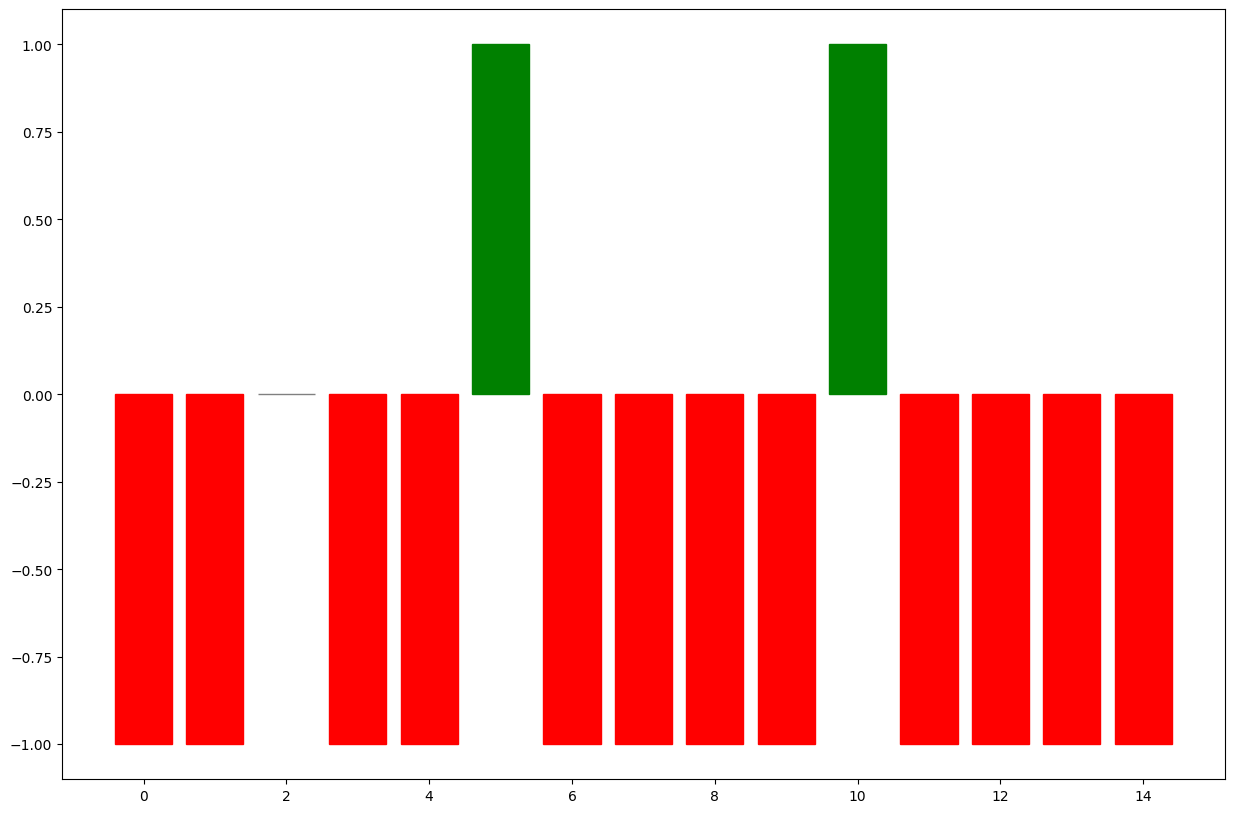

<Figure size 1500x800 with 0 Axes>

In [1]:
import yfinance as yf  # สำหรับดึงข้อมูลหุ้นจาก Yahoo Finance
import pandas as pd    # สำหรับจัดการข้อมูลในรูปแบบตาราง
import numpy as np     # สำหรับการคำนวณทางคณิตศาสตร์
from datetime import datetime, timedelta  # สำหรับจัดการเรื่องวันที่และเวลา
import matplotlib.pyplot as plt  # สำหรับสร้างกราฟ

def calculate_ema(data, period):
    """
    คำนวณค่าเฉลี่ยเคลื่อนที่แบบถ่วงน้ำหนักแบบเลขชี้กำลัง (Exponential Moving Average)
    
    Parameters:
    data (pandas.Series): ข้อมูลราคาที่ต้องการคำนวณ EMA
    period (int): จำนวนวันที่ใช้ในการคำนวณ EMA
    
    Returns:
    pandas.Series: ค่า EMA ที่คำนวณได้
    """
    return data.ewm(span=period, adjust=False).mean()

def get_unit_step(value):
    """
    แปลงค่าเป็น 1, -1 หรือ 0 ตามเงื่อนไข เพื่อใช้ในการคำนวณ Market Breadth
    
    Parameters:
    value (float): ค่าที่ต้องการแปลง
    
    Returns:
    int: 1 ถ้าค่าเป็นบวก, -1 ถ้าค่าเป็นลบ, 0 ถ้าค่าเป็นศูนย์
    """
    if value > 0:
        return 1
    elif value < 0:
        return -1
    return 0

class MarketBreadthAnalyzer:
    """
    คลาสสำหรับวิเคราะห์ Market Breadth ของหุ้นในกลุ่ม SET100
    ใช้การวิเคราะห์ทางเทคนิคหลากหลายรูปแบบเพื่อประเมินสภาวะตลาดโดยรวม
    """
    
    def __init__(self):
        """
        เริ่มต้นการทำงานของคลาส MarketBreadthAnalyzer
        กำหนดค่าเริ่มต้นสำหรับรายชื่อหุ้น SET100 และพื้นที่เก็บข้อมูล
        """
        self.set100_symbols = self.get_set100_symbols()  # รายชื่อหุ้น SET100
        self.data = {}  # dictionary สำหรับเก็บข้อมูลราคาของแต่ละหุ้น
        
    def get_set100_symbols(self):
        # รายชื่อหุ้นใน SET 100
        # Format: {symbol}.BK for Thai stocks
        return [f"{symbol}.BK" for symbol in [
    'AAV', 'ADVANC', 'AEONTS', 'AMATA', 'AOT', 'AP', 'AWC', 'BA', 'BAM', 'BANPU',
    'BBL', 'BCH', 'BCP', 'BCPG', 'BDMS', 'BEM', 'BGRIM', 'BH', 'BJC', 'BLA',
    'BTG', 'BTS', 'CBG', 'CCET', 'CENTEL', 'CHG', 'CK', 'CKP', 'COCOCO', 'COM7',
    'CPALL', 'CPF', 'CPN', 'CRC', 'DELTA', 'DOHOME', 'EA', 'EGCO', 'ERW', 'GLOBAL',
    'GPSC', 'GULF', 'GUNKUL', 'HANA', 'HMPRO', 'ICHI', 'IRPC', 'ITC', 'IVL', 'JAS',
    'JMART', 'JMT', 'KBANK', 'KCE', 'KKP', 'KTB', 'KTC', 'LH', 'M', 'MEGA',
    'MINT', 'MOSHI', 'MTC', 'OR', 'OSP', 'PLANB', 'PR9', 'PRM', 'PTT', 'PTTEP',
    'PTTGC', 'QH', 'RATCH', 'RCL', 'ROJNA', 'SAPPE', 'SAWAD', 'SCB', 'SCC', 'SCGP',
    'SIRI', 'SISB', 'SJWD', 'SKY', 'SNNP', 'SPALI', 'SPRC', 'STA', 'STGT', 'TASCO',
    'TCAP', 'TIDLOR', 'TISCO', 'TLI', 'TOP', 'TRUE', 'TTB', 'TU', 'VGI', 'WHA']] # รายชื่อหุ้นทั้งหมด 100 ตัว
    
    def fetch_data(self, period="1y"):
        """
        ดึงข้อมูลราคาหุ้นจาก Yahoo Finance สำหรับทุกหุ้นใน SET100
        
        Parameters:
        period (str): ช่วงเวลาที่ต้องการดึงข้อมูล (default: "1y" คือ 1 ปี)
                     สามารถระบุเป็น "1d", "5d", "1mo", "3mo", "6mo", "1y", "2y", "5y", "10y", "ytd", "max"
        
        Notes:
        - ข้อมูลที่ดึงมาจะถูกเก็บใน self.data
        - หากมีข้อผิดพลาดในการดึงข้อมูล จะแสดงข้อความแจ้งเตือน
        """
        for symbol in self.set100_symbols:
            try:
                stock = yf.Ticker(symbol)
                self.data[symbol] = stock.history(period=period)
            except Exception as e:
                print(f"Error fetching data for {symbol}: {e}")
                
    def calculate_mcclellan_oscillator(self):
        """
        คำนวณค่า McClellan Oscillator จากข้อมูลราคาหุ้น
        
        Returns:
        int: 1 ถ้าแนวโน้มเป็นขาขึ้น, -1 ถ้าแนวโน้มเป็นขาลง, 0 ถ้าไม่มีแนวโน้มชัดเจน
        """
        ana_list = []  # สร้างลิสต์เปล่าเพื่อเก็บค่า ANA (Advance-Decline Net Average) ของแต่ละหุ้น
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 1:
                    # คำนวณว่าราคาปิดวันนี้สูงกว่าเมื่อวาน (advance) หรือต่ำกว่า (decline)
                    advance = (df['Close'] > df['Close'].shift(1)).astype(int)  # แปลงเป็น 1 ถ้าราคาขึ้น
                    decline = (df['Close'] < df['Close'].shift(1)).astype(int)  # แปลงเป็น 1 ถ้าราคาลง
                    
                    # คำนวณ ANA = (advance - decline) / (advance + decline)
                    # เพิ่ม 1e-6 เพื่อป้องกันการหารด้วย 0
                    ana = (advance - decline) / (advance + decline + 1e-6)
                    ana_list.append(ana)

        if not ana_list:
            return 0

        # รวมค่า ANA ของทุกหุ้นและหาค่าเฉลี่ย
        ana_df = pd.concat(ana_list, axis=1).mean(axis=1)
    
        # คำนวณ EMA 19 วันและ 39 วัน
        ema19 = ana_df.ewm(span=19, adjust=False).mean()
        ema39 = ana_df.ewm(span=39, adjust=False).mean()
        
        # McClellan Oscillator = EMA19 - EMA39
        mcclellan = ema19 - ema39

        # แปลงผลลัพธ์เป็น 1, 0, หรือ -1
        return get_unit_step(mcclellan.iloc[-1])

    def calculate_mcclellan_volume_oscillator(self):
        """
        คำนวณค่า McClellan Volume Oscillator จากข้อมูลปริมาณการซื้อขาย
        
        Returns:
        int: 1 ถ้าแนวโน้มเป็นขาขึ้น, -1 ถ้าแนวโน้มเป็นขาลง, 0 ถ้าไม่มีแนวโน้มชัดเจน
        """
        anva_list = []  # สร้างลิสต์เปล่าเพื่อเก็บค่า ANVA (Advance-Decline Net Volume Average)
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 1:
                    # แยก volume เป็น 2 ส่วนตามทิศทางราคา
                    up_vol = df['Volume'].where(df['Close'] > df['Close'].shift(1), 0)   # volume เมื่อราคาขึ้น
                    down_vol = df['Volume'].where(df['Close'] < df['Close'].shift(1), 0) # volume เมื่อราคาลง
                    
                    # คำนวณ ANVA = (up_volume - down_volume) / (up_volume + down_volume)
                    anva = (up_vol - down_vol) / (up_vol + down_vol + 1e-6)
                    anva_list.append(anva)

        if not anva_list:
            return 0

        # รวมค่า ANVA ของทุกหุ้นและหาค่าเฉลี่ย
        anva_df = pd.concat(anva_list, axis=1).mean(axis=1)
        
        # คำนวณ EMA 19 วันและ 39 วัน
        ema19 = anva_df.ewm(span=19, adjust=False).mean()
        ema39 = anva_df.ewm(span=39, adjust=False).mean()
        
        # McClellan Volume Oscillator = EMA19 - EMA39
        mcclellan_volume = ema19 - ema39

        # แปลงผลลัพธ์เป็น 1, 0, หรือ -1
        return get_unit_step(mcclellan_volume.iloc[-1])
    
    def calculate_new_highs_lows(self, period_days):
        """
        เปรียบเทียบจำนวนหุ้นที่ทำจุดสูงสุดใหม่กับจุดต่ำสุดใหม่
        
        Parameters:
        period_days (int): จำนวนวันย้อนหลังที่ใช้ในการคำนวณ
                          - 260 วัน สำหรับรายปี
                          - 65 วัน สำหรับรายไตรมาส
                          - 20 วัน สำหรับรายเดือน
        
        Returns:
        int: 1 ถ้ามีหุ้นทำจุดสูงสุดใหม่มากกว่า, -1 ถ้ามีหุ้นทำจุดต่ำสุดใหม่มากกว่า, 0 ถ้าเท่ากัน
        """
        new_highs = new_lows = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > period_days:
                    current_price = df['Close'].iloc[-1]
                    period_high = df['High'].iloc[-period_days:].max()
                    period_low = df['Low'].iloc[-period_days:].min()
                    
                    if current_price >= period_high:
                        new_highs += 1
                    if current_price <= period_low:
                        new_lows += 1
        
        return get_unit_step(new_highs - new_lows)
    
    def calculate_advance_decline_volume_ratio(self):
        # วัดความสัมพันธ์ระหว่างปริมาณการซื้อขายของหุ้นที่ขึ้นกับลง
        advance_volume = decline_volume = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 1:
                    if df['Close'].iloc[-1] > df['Close'].iloc[-2]:
                        advance_volume += df['Volume'].iloc[-1]
                    else:
                        decline_volume += df['Volume'].iloc[-1]
        
        ratio = advance_volume / (advance_volume + decline_volume + 1)
        return 1 if ratio >= 0.5 else -1
    
    def calculate_macd_indicators(self):
        # วิเคราะห์แนวโน้มโดยใช้ MACD (Moving Average Convergence Divergence)
        # ดูทั้งค่า MACD และสัญญาณ MACD
        macd_positive = macd_negative = 0
        macd_sig_positive = macd_sig_negative = 0
        
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 26:
                    exp12 = df['Close'].ewm(span=12, adjust=False).mean()
                    exp26 = df['Close'].ewm(span=26, adjust=False).mean()
                    macd = exp12 - exp26
                    signal = macd.ewm(span=9, adjust=False).mean()
                    
                    if macd.iloc[-1] > 0:
                        macd_positive += 1
                    else:
                        macd_negative += 1
                        
                    if macd.iloc[-1] > signal.iloc[-1]:
                        macd_sig_positive += 1
                    else:
                        macd_sig_negative += 1
        
        macd_step = get_unit_step(macd_positive - macd_negative)
        macd_sig_step = get_unit_step(macd_sig_positive - macd_sig_negative)
        return macd_step, macd_sig_step
    
    def calculate_rsi_indicator(self):
        rsi_positive = rsi_negative = 0
        # วัดความแข็งแกร่งของแนวโน้มโดยใช้ RSI (Relative Strength Index)
        
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 14:
                    delta = df['Close'].diff()
                    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
                    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
                    rs = gain / loss
                    rsi = 100 - (100 / (1 + rs))
                    
                    if rsi.iloc[-1] > 50:
                        rsi_positive += 1
                    else:
                        rsi_negative += 1
        
        return get_unit_step(rsi_positive - rsi_negative)
    
    def calculate_ema_golden_cross(self):
        # ตรวจจับการตัดกันของค่าเฉลี่ยเคลื่อนที่ (Golden Cross)
        ema_positive = ema_negative = 0
        
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 89:
                    ema89 = df['Close'].ewm(span=89, adjust=False).mean()
                    if df['Close'].iloc[-1] > ema89.iloc[-1]:
                        ema_positive += 1
                    else:
                        ema_negative += 1
        
        return get_unit_step(ema_positive - ema_negative)
    
    def calculate_stochastic_trend(self):
        # วัดโมเมนตัมของราคาโดยใช้ Stochastic Oscillator
        stoch_up = stoch_down = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 14:
                    high_14 = df['High'].rolling(window=14).max()
                    low_14 = df['Low'].rolling(window=14).min()
                    k = 100 * (df['Close'] - low_14) / (high_14 - low_14)
                    d = k.rolling(window=3).mean()
                    
                    if k.iloc[-1] > d.iloc[-1]:  # Bullish crossover
                        stoch_up += 1
                    else:
                        stoch_down += 1
        return get_unit_step(stoch_up - stoch_down)

    def calculate_vpt_trend(self):
        # วิเคราะห์ความสัมพันธ์ระหว่างปริมาณการซื้อขายและราคา
        vpt_positive = vpt_negative = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 1:
                    price_change = df['Close'].pct_change()
                    vpt = (df['Volume'] * price_change).cumsum()
                    vpt_sma = vpt.rolling(window=20).mean()
                    
                    if vpt.iloc[-1] > vpt_sma.iloc[-1]:
                        vpt_positive += 1
                    else:
                        vpt_negative += 1
        return get_unit_step(vpt_positive - vpt_negative)

    def calculate_roc_trend(self):
        # วัดอัตราการเปลี่ยนแปลงของราคา
        roc_positive = roc_negative = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 10:
                    roc = ((df['Close'] - df['Close'].shift(10)) / df['Close'].shift(10)) * 100
                    if roc.iloc[-1] > 0:
                        roc_positive += 1
                    else:
                        roc_negative += 1
        return get_unit_step(roc_positive - roc_negative)

    def calculate_obv_trend(self):
        # วิเคราะห์ความสัมพันธ์ระหว่างปริมาณการซื้อขายและทิศทางราคา
        obv_positive = obv_negative = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 20:
                    obv = (df['Volume'] * (~df['Close'].diff().le(0) * 2 - 1)).cumsum()
                    obv_sma = obv.rolling(window=20).mean()
                    
                    if obv.iloc[-1] > obv_sma.iloc[-1]:
                        obv_positive += 1
                    else:
                        obv_negative += 1
        return get_unit_step(obv_positive - obv_negative)

    def calculate_atr_trend(self):
        # วัดความผันผวนของตลาด
        atr_expanding = atr_contracting = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 14:
                    high_low = df['High'] - df['Low']
                    high_close = abs(df['High'] - df['Close'].shift())
                    low_close = abs(df['Low'] - df['Close'].shift())
                    ranges = pd.concat([high_low, high_close, low_close], axis=1)
                    true_range = ranges.max(axis=1)
                    atr = true_range.rolling(window=14).mean()
                    
                    # Compare current ATR with previous period
                    if atr.iloc[-1] > atr.iloc[-2]:
                        atr_expanding += 1
                    else:
                        atr_contracting += 1
        return get_unit_step(atr_expanding - atr_contracting)

    def calculate_total_score(self):
        """
        คำนวณคะแนนรวมของ Market Breadth จากทุกตัวชี้วัด
        
        Returns:
        tuple: (total_score, scores)
            - total_score (int): คะแนนรวมของ Market Breadth (-15 ถึง +15)
            - scores (list): รายการคะแนนของแต่ละตัวชี้วัด (แต่ละตัวมีค่า -1, 0, หรือ 1)
        
        Notes:
        - ดึงข้อมูลล่าสุดจาก Yahoo Finance ก่อนคำนวณ
        - รวมตัวชี้วัดทั้งหมด 15 ตัว
        - คะแนนบวกแสดงถึงแนวโน้มขาขึ้น คะแนนลบแสดงถึงแนวโน้มขาลง
        """
        self.fetch_data()
        
        scores = []
        scores.append(self.calculate_mcclellan_oscillator())  # 1
        scores.append(self.calculate_mcclellan_volume_oscillator())  # 2
        scores.append(self.calculate_new_highs_lows(260))  # 3
        scores.append(self.calculate_new_highs_lows(65))  # 4
        scores.append(self.calculate_new_highs_lows(20))  # 5
        scores.append(self.calculate_advance_decline_volume_ratio())  # 6
        
        macd_step, macd_sig_step = self.calculate_macd_indicators()
        scores.append(macd_step)  # 7
        scores.append(macd_sig_step)  # 8
        
        scores.append(self.calculate_rsi_indicator())  # 9
        scores.append(self.calculate_ema_golden_cross())  # 10
        
        scores.append(self.calculate_stochastic_trend())  # 11
        scores.append(self.calculate_vpt_trend())  # 12
        scores.append(self.calculate_roc_trend())  # 13
        scores.append(self.calculate_obv_trend())  # 14
        scores.append(self.calculate_atr_trend())  # 15
        
        total_score = sum(scores)
        return total_score, scores

def create_visualization(results_df):
    """
    สร้างกราฟแสดงผลการวิเคราะห์ Market Breadth
    
    Parameters:
    results_df (pd.DataFrame): DataFrame ที่มีผลการวิเคราะห์
    """
    current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
    
    # 1. กราฟแท่งแสดงคะแนนแต่ละตัวชี้วัด
    plot_data = results_df[:-2].copy()
    plt.figure(figsize=(15, 10))  # เพิ่มความสูงเพื่อให้มีพื้นที่สำหรับคำอธิบาย
    
    # สร้างแท่งกราฟ
    bars = plt.bar(range(len(plot_data)), plot_data['Score'])
    
    # กำหนดสีแท่งกราฟ
    for i, bar in enumerate(bars):
        if plot_data['Score'].iloc[i] > 0:
            bar.set_color('green')
        elif plot_data['Score'].iloc[i] < 0:
            bar.set_color('red')
        else:
            bar.set_color('gray')
    
    # Create figure with more space at bottom for interpretation
    plt.figure(figsize=(15, 14))  # Increased height further to accommodate interpretation text
    
    # Create main subplot for the bar chart - use less vertical space for chart
    ax = plt.subplot2grid((7, 1), (0, 0), rowspan=5)  # Use 5/7 of vertical space for chart
    
    # Plot bars
    bars = ax.bar(range(len(plot_data)), plot_data['Score'])
    
    # Color the bars
    for i, bar in enumerate(bars):
        if plot_data['Score'].iloc[i] > 0:
            bar.set_color('green')
        elif plot_data['Score'].iloc[i] < 0:
            bar.set_color('red')
        else:
            bar.set_color('gray')
    
    # Customize the bar chart
    ax.set_title('Individual Market Breadth Indicators', fontsize=14, pad=20)
    ax.set_xlabel('Indicators', fontsize=12)
    ax.set_ylabel('Score (-1 to 1)', fontsize=12)
    ax.set_xticks(range(len(plot_data)))
    ax.set_xticklabels(plot_data['Indicator'], rotation=45, ha='right')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on bars
    for i, v in enumerate(plot_data['Score']):
        ax.text(i, v, str(v), ha='center', va='bottom' if v >= 0 else 'top')
    
    # Add interpretation text in the bottom subplot - use more space for text
    interpretation_ax = plt.subplot2grid((7, 1), (5, 0), rowspan=2)  # Use 2/7 of vertical space for text
    interpretation_ax.axis('off')  # Hide axes
    interpretation = """Interpretation:
• Green bars (1): Bullish signal/Upward trend
• Red bars (-1): Bearish signal/Downward trend
• Gray bars (0): Neutral signal/No clear trend"""
    interpretation_ax.text(0.1, 0.5, interpretation, 
                         fontsize=12,  # Increased font size
                         family='DejaVu Sans',
                         va='center',
                         multialignment='left',
                         linespacing=2)  # Increased line spacing
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)  # Increased space between chart and interpretation
    plt.savefig(f'market_breadth_indicators_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Pie chart showing distribution
    plt.figure(figsize=(10, 10))
    positive = len(plot_data[plot_data['Score'] > 0])
    negative = len(plot_data[plot_data['Score'] < 0])
    neutral = len(plot_data[plot_data['Score'] == 0])
    
    plt.pie([positive, negative, neutral], 
           labels=['Positive', 'Negative', 'Neutral'],
           colors=['green', 'red', 'gray'],
           autopct='%1.1f%%',
           startangle=90)
    
    plt.title('Distribution of Market Breadth Indicators', pad=20)
    
    # Add interpretation
    interpretation = f"""
    Interpretation:
    • High Green (Positive) ratio = Bullish market trend
    • High Red (Negative) ratio = Bearish market trend
    • High Gray (Neutral) ratio = Sideways market
    
    Summary: {
        'Strong Bullish Market Trend' if positive > max(negative, neutral) and positive > len(plot_data)/2 else
        'Strong Bearish Market Trend' if negative > max(positive, neutral) and negative > len(plot_data)/2 else
        'Sideways Market - No Clear Trend'
    }
    """
    plt.figtext(0.1, 0.02, interpretation, fontsize=10, ha='left', family='DejaVu Sans')
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.3)
    plt.savefig(f'market_breadth_distribution_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 3. Summary graphs showing total score and percentage
    plt.figure(figsize=(15, 8))
    
    # Create 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
    
    # Total score bar graph
    total_score = results_df.iloc[-2]['Score']
    bar = ax1.bar(['Total Score'], [total_score], color='blue' if total_score >= 0 else 'red')
    ax1.set_title('Total Market Breadth Score', pad=20)
    ax1.set_ylim(min(-15, total_score - 1), max(15, total_score + 1))
    ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax1.text(0, total_score, f'{total_score}', ha='center', va='bottom' if total_score >= 0 else 'top')
    
    # Percentage bar graph
    percentage = results_df.iloc[-1]['Score']
    bar = ax2.bar(['Market Breadth %'], [percentage], color='blue')
    ax2.set_title('Market Breadth Percentage', pad=20)
    ax2.set_ylim(0, 100)
    ax2.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax2.text(0, percentage, f'{percentage:.1f}%', ha='center', va='bottom')
    
    # Add interpretation
    interpretation = f"""
    Interpretation:
    • Total Score (-15 to +15): {
        'Very Bullish Market' if total_score >= 10 else
        'Bullish Market' if total_score >= 5 else
        'Slightly Bullish Market' if total_score > 0 else
        'Neutral Market' if total_score == 0 else
        'Slightly Bearish Market' if total_score > -5 else
        'Bearish Market' if total_score > -10 else
        'Very Bearish Market'
    }
    
    • Market Breadth % (0-100%): {
        'Market is Overbought' if percentage >= 70 else
        'Bullish Market Trend' if percentage >= 50 else
        'Market is Oversold' if percentage <= 30 else
        'Bearish Market Trend'
    }
    """
    plt.figtext(0.1, 0.02, interpretation, fontsize=10, ha='left')
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.3)  # ปรับพื้นที่ด้านล่างให้มีที่สำหรับคำอธิบาย
    plt.savefig(f'market_breadth_summary_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.close()

def main():
    """
    ฟังก์ชันหลักสำหรับการทำงานของโปรแกรม
    
    การทำงาน:
    1. สร้าง instance ของ MarketBreadthAnalyzer
    2. คำนวณคะแนน Market Breadth
    3. สร้างรายงานผลการวิเคราะห์
    4. บันทึกผลลัพธ์ลงไฟล์ CSV
    5. แสดงผลลัพธ์บนหน้าจอ
    6. สร้างและบันทึกกราฟวิเคราะห์
    """
    analyzer = MarketBreadthAnalyzer()
    total_score, individual_scores = analyzer.calculate_total_score()
    
    # Create results dictionary with additional indicators
    results = {
        'Indicator': [
            'McClellan Oscillator',
            'McClellan Volume Oscillator',
            'New High-Low (Year)',
            'New High-Low (Quarter)',
            'New High-Low (Month)',
            'Advance/Decline Volume Ratio',
            'MACD Positive-Negative',
            'MACD Signal Positive-Negative',
            'RSI Positive-Negative',
            'EMA Golden Cross',
            'Stochastic Oscillator Trend',
            'Volume Price Trend (VPT)',
            'Price Rate of Change (ROC)',
            'On-Balance Volume (OBV)',
            'ATR Trend'
        ],
        'Score': individual_scores
    }
    
    # Create DataFrame and save to CSV
    df = pd.DataFrame(results)
    df.loc[len(df)] = ['Total Score', total_score]
    df.loc[len(df)] = ['Market Breadth Percentage', ((total_score + 15) / 30) * 100]  # Updated for 15 indicators
    
    # Get current date and time for filename
    current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
    csv_filename = f"set_market_breadth_results_{current_time}.csv"
    df.to_csv(csv_filename, index=False)
    
    # Print results to console
    print("\nUnit Step Market Breadth Analysis Results:")
    print("-" * 50)
    for i, (indicator, score) in enumerate(zip(results['Indicator'], results['Score']), 1):
        print(f"{i}. {indicator}: {score}")
    print("-" * 50)
    print(f"Total Market Breadth Score: {total_score}")
    print(f"Market Breadth Percentage: {((total_score + 15) / 30) * 100:.2f}%")  # Updated for 15 indicators
    print(f"\nResults have been saved to: {csv_filename}")
    
    # Create and save visualizations
    create_visualization(df)
    print("\nVisualization graphs have been saved as PNG files.")

if __name__ == "__main__":
    main() 